In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
import csv
data =pd.read_csv('heart.csv')#file
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#confusion matrix para
y=data['target']
X=data.drop('target',axis=1)
print(X.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#we will use a standard scaler to scale the faetures of preprocessing 
scaler=StandardScaler()
scale=scaler.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [31]:
#craeting logistic regression model
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [34]:
#accuracy
score=accuracy_score(y_test,pred)
score
#85% of the time it will be corect

0.8524590163934426

In [35]:
#creating confusion matrix
confusion_matrix(y_test,pred)
#25 is the true positive value

array([[25,  4],
       [ 5, 27]])

In [36]:
#wxtraxtig TN,TP,FP,FN
tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
(tn,fp,fn,tp)

(25, 4, 5, 27)

In [37]:
#confusion matrix metrics 
matrix=classification_report(y_test,pred)
print('Classification report:\n',matrix)


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



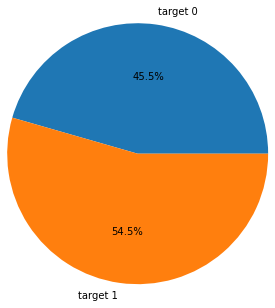

In [45]:
import matplotlib.pyplot as plt 
data_target = data.groupby("target").size()
plt.pie(data_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5) 
plt.show()

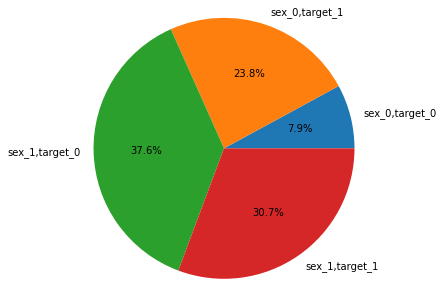

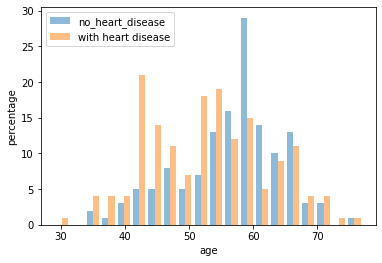

In [51]:
data_sex = data.groupby(["sex","target"]).size()
plt.pie(data_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5)
plt.show()

#histogram
plt.hist([data[data.target==0].age, data[data.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()